# IC Power Supply

The following notebook enables you to explore how different values of R and C and different power draw patterns can impact the noise on a voltage supply.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
matplotlib.interactive(True)
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

The following variables can be adjusted to modify the simulation of the IC power supply:


In [2]:
Vs = 3
R = 2
C = 1e-9
T = 11e-9
tp = 1e-9
i_0 = 1
V_initial = Vs

<IPython.core.display.Javascript object>


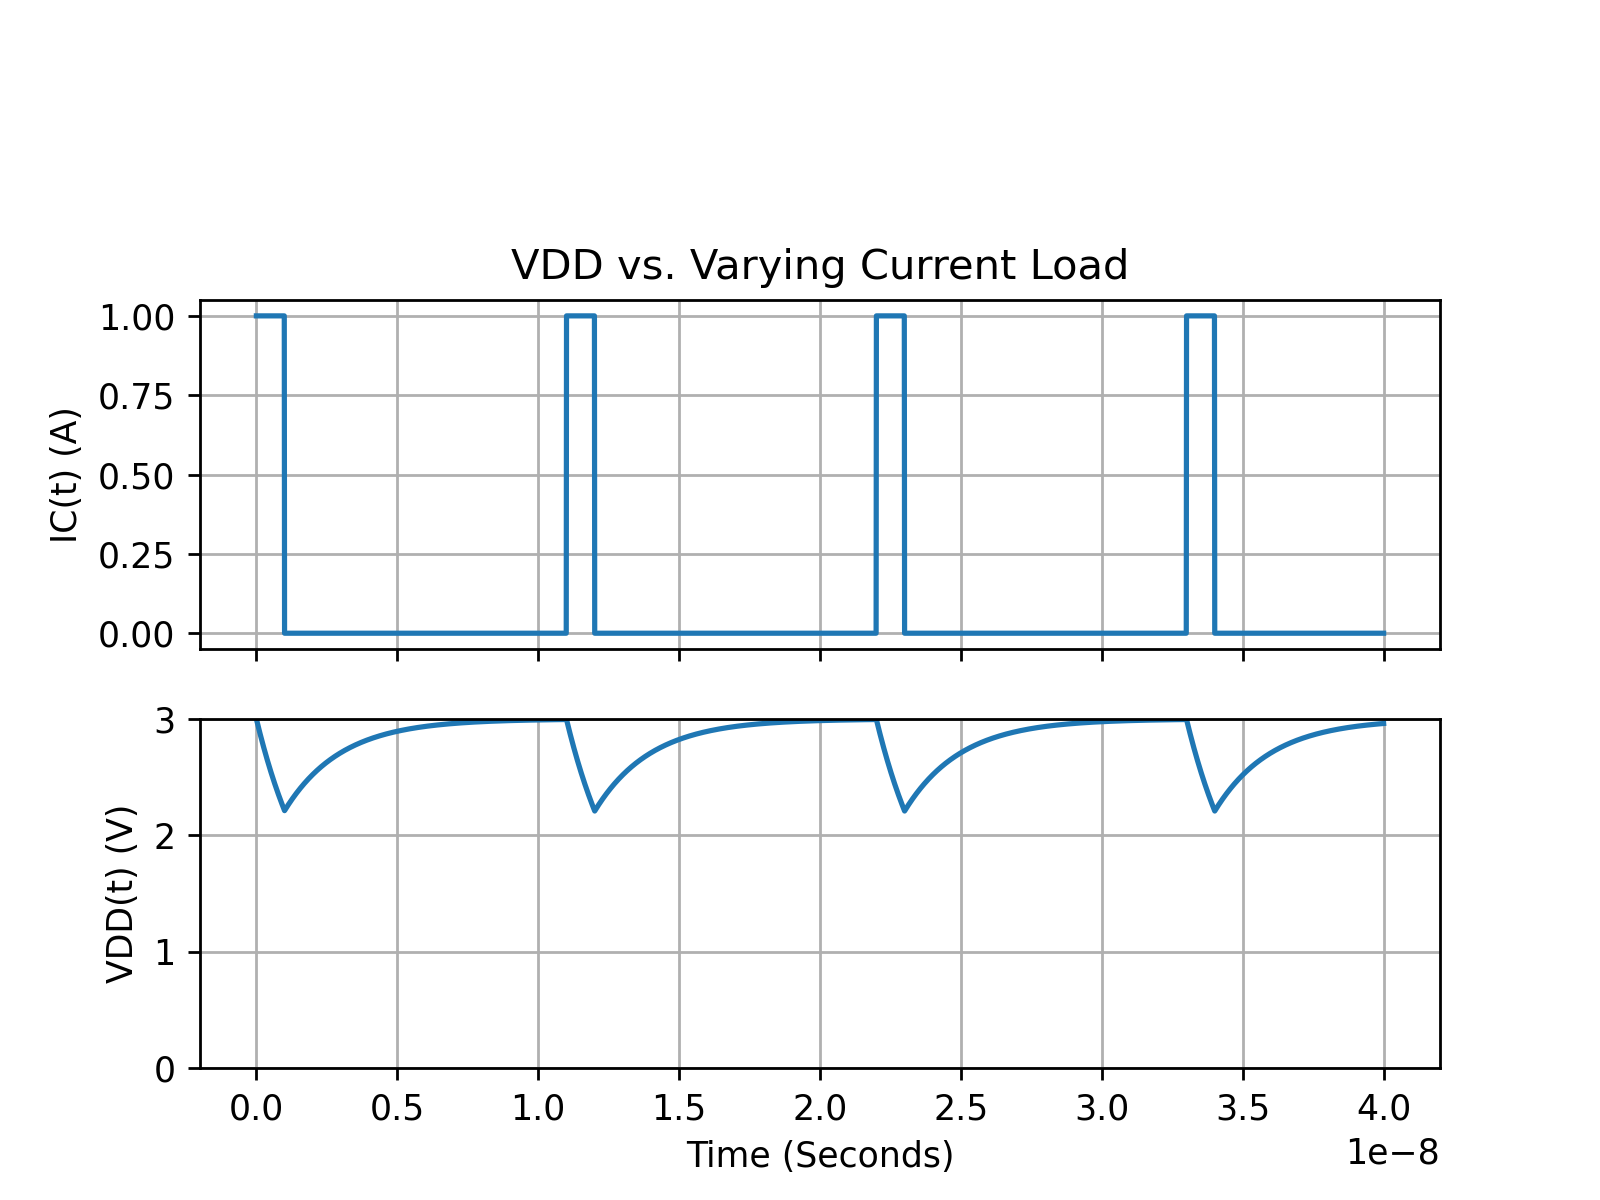

(0.0, 3.0)

In [3]:
def run_simulation():
    """
    This function initializes arrays containing data such as voltages and 
    time steps based on the parameters from the previous cell. Then it
    simulates the output voltage Vdd from these parameters.
    """
    # Calculate timesteps and initial conditions
    t_initial = 0
    t_final = 40e-9
    # Set the simulation time step to be at least 10 times smaller than the RC time constant
    # Or 100x smaller than the width of the current pulse, whichever is smaller
    delta_t = min((R * C) / 10, tp / 100)
    n_steps = int((t_final - t_initial) // delta_t)

    # Generate array of times and an empty array of Output voltages
    t = np.linspace(t_initial, t_final, n_steps)
    Vdd = np.zeros([n_steps])

    # Generate array of source current pulses vs. time
    i_source = np.zeros([n_steps])
    for i in range(n_steps):
        if t[i] % T < tp:
            i_source[i] += i_0

    # Set initial condition on output Voltage
    Vdd[0] = V_initial

    # Use Forward Euler method to calculate Vdd
    # TODO: In the future, switch to using Backward Euler or Runge-Kutta for better
    # stability
    for i in range(1, n_steps):
        Vdd[i] = (delta_t*(1/C)*((Vs/R) - (Vdd[i-1]/R) - i_source[i-1])) + Vdd[i-1]
    return t, i_source, Vdd

t, i_source, Vdd = run_simulation()

# Plot the results
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(top=0.75)
data_isource, = ax1.plot(t, i_source)
ax1.grid(True)
ax1.set_ylabel('IC(t) (A)')
ax1.set_title('VDD vs. Varying Current Load')

data_vdd, = ax2.plot(t, Vdd)
ax2.grid(True)
ax2.set_xlabel('Time (Seconds)')
ax2.set_ylabel('VDD(t) (V)')
ax2.set_ylim([0,Vs])